In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def read_binary_image(file_path, size=(256, 256)):
    return np.fromfile(file_path, dtype=np.uint8).reshape(size)

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  

In [3]:
def gaussian_low_pass_filter(shape, cutoff):
    """Tạo bộ lọc Gaussian low-pass."""
    rows, cols = shape
    center_row, center_col = rows // 2, cols // 2
    y, x = np.ogrid[:rows, :cols]
    distance = np.sqrt((x - center_col)**2 + (y - center_row)**2)
    filter = np.exp(-(distance**2) / (2 * (cutoff**2)))
    return filter

def apply_filter(image, filter):
    """Áp dụng bộ lọc lên ảnh trong không gian tần số."""
    # Chuyển đổi sang không gian tần số
    dft = np.fft.fft2(image)
    dft_shifted = np.fft.fftshift(dft)
    # Áp dụng bộ lọc
    filtered_dft = dft_shifted * filter
    # Chuyển ngược về không gian không gian ảnh
    dft_ishifted = np.fft.ifftshift(filtered_dft)
    filtered_image = np.fft.ifft2(dft_ishifted)
    return np.abs(filtered_image)

# def compute_mse(original, filtered):
#     """Tính Mean Squared Error (MSE)."""
#     return np.mean((original - filtered) ** 2)

def compute_mse(image1, image2):
    """Tính Mean Squared Error (MSE) giữa hai ảnh."""
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    mse_value = np.mean(diff ** 2)
    return mse_value

def compute_isnr(original, noisy, filtered):
    """Tính Improvement in Signal-to-Noise Ratio (ISNR)."""
    numerator = np.sum((original - noisy) ** 2)
    denominator = np.sum((original - filtered) ** 2)
    return 10 * np.log10(numerator / denominator)

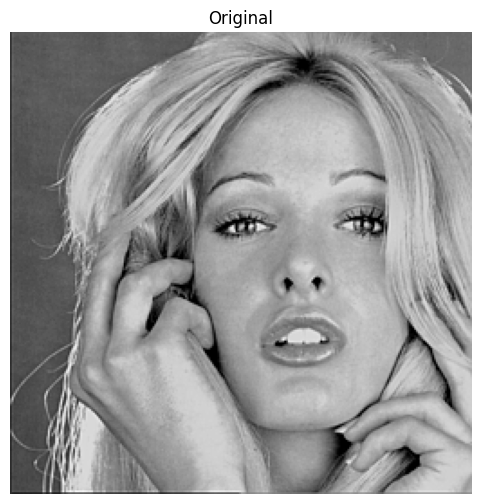

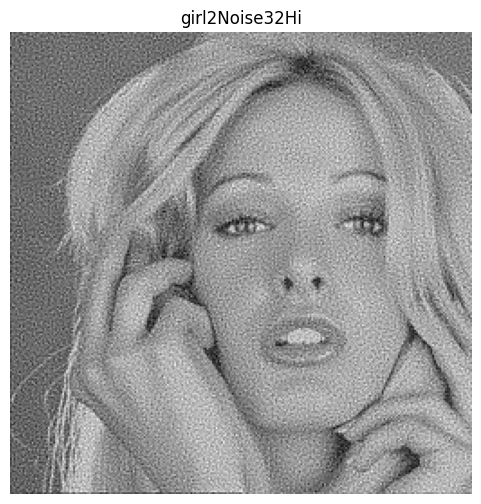

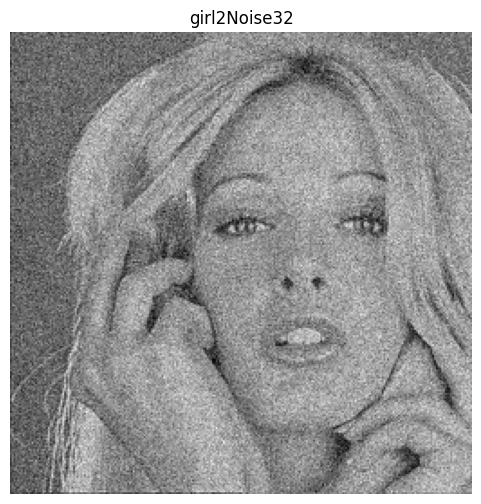

In [4]:
# Load các ảnh đầu vào (256x256)
original = read_binary_image('../../data/girl2bin.sec')
show_image("Original", original)
save_image(original, "original.png")

noisy_high = read_binary_image('../../data/girl2Noise32Hibin.sec')
show_image("girl2Noise32Hi", noisy_high)
save_image(noisy_high, "girl2Noise32Hi.png")

noisy_low = read_binary_image('../../data/girl2Noise32bin.sec')
show_image("girl2Noise32", noisy_low)
save_image(noisy_low, "girl2Noise32.png")

In [5]:
# Tạo bộ lọc Gaussian low-pass 64
cutoff = 64
filter = gaussian_low_pass_filter(original.shape, cutoff)

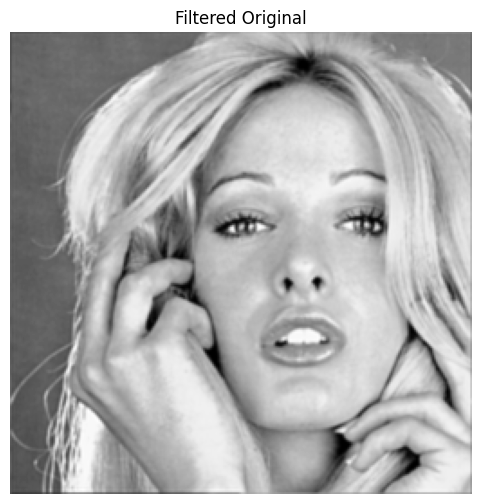

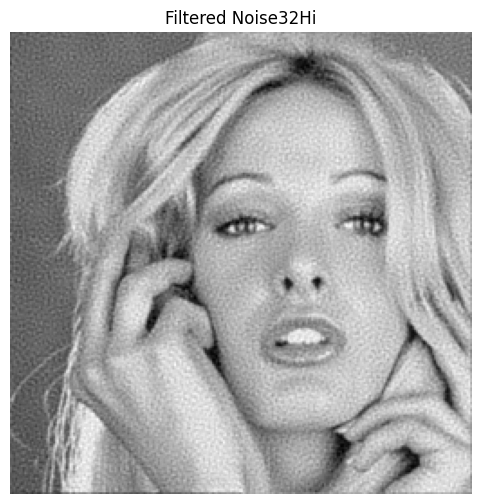

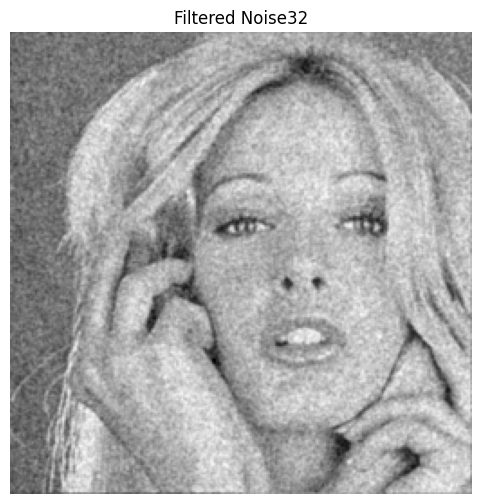

In [6]:
# Áp dụng bộ lọc
filtered_original = apply_filter(original, filter)
show_image("Filtered Original", filtered_original)
save_image(filtered_original, "filtered_original.png")

filtered_high = apply_filter(noisy_high, filter)
show_image("Filtered Noise32Hi", filtered_high)
save_image(filtered_high, "filtered_noise32hi.png")

filtered_low = apply_filter(noisy_low, filter)
show_image("Filtered Noise32", filtered_low)
save_image(filtered_low, "filtered_noise32.png")

In [7]:
# Tính MSE
mse_original = compute_mse(original, filtered_original)
mse_high = compute_mse(original, filtered_high)
mse_low = compute_mse(original, filtered_low)

# Tính ISNR cho các ảnh nhiễu
isnr_high = compute_isnr(original, noisy_high, filtered_high)
isnr_low = compute_isnr(original, noisy_low, filtered_low)

In [8]:
# Kết quả
print(f"MSE (Original): {mse_original:.2e}")
print(f"MSE (High Noise): {mse_high:.2e}")
print(f"MSE (Low Noise): {mse_low:.2e}")
print(f"ISNR (High Noise): {isnr_high:.2f}")
print(f"ISNR (Low Noise): {isnr_low:.2f}")

MSE (Original): 6.31e+01
MSE (High Noise): 4.14e+02
MSE (Low Noise): 5.31e+02
ISNR (High Noise): -6.39
ISNR (Low Noise): -7.39
